# Analiza podataka (sreća u svijetu)

* Podatci korišteni u radu: https://www.kaggle.com/unsdsn/world-happiness?select=2015.csv

Podatci dolaze iz izvještaja o svjetskoj sreći koje je objavljeno 20. ožujka 2015. godine od strane UN-a povodom međunarodnog dana sreće. Sreća pojedinca ocijenjena je pomoću Cantrilove ljestvice koja sadrži 10 stepenica, gdje 0 označava najgori mogući život dok 10 predstavlja najbolji mogući život. Pojedinci su pitani sljedeće pitanje: „Ovdje je slika ljestvi. Pretpostavimo da vrh ljestvi predstavlja najbolji mogući život za vas, a dno ljestvi najgori mogući život. Prema vašem osobnom osjećaju, gdje ste trenutno na ovim ljestvama?" (skala odgovora od 0 – 10) Nakon ocjenjivanja sreće, podatci također sadrže procjenu čimbenika koji mogu pridonijeti skali sreće što znači da ukoliko je sreća pojedinca u državi je ocjenjena s 8, a jedan čimbenik sadrži ocjenu od 2, taj je čimbenik onda zaslužan za 2/8 sreće u određenoj državi. Primjeri takvih čimbenika su: ekonomija (bdp), obiteljski odnosi, zdravlje (životni vijek), sloboda pojedinca, odsutnost političke korupcije, velikodušnost stanovništva
<br><br><br>

### Napomena: sljedeći dio će sadržavati kodove koji se koriste kako bi se pripremili podatci i vizualizacija podataka koji će se koristiti u tekstu (svi tekstovi koji se nalaze u tamnoj pozadini mogu se preskočiti) <br><br><br>

Plan rada:
* Pripremiti podatke za analizu
* Pokazati korelacije za sreću
* Prikazati razliku u regijama
* Prikazati podatke za hrvatsku gdje se nalazi
* Prikazati svaki pojedini pojam (najveće vrijednosti, možda najmanje kasnije)

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

podatci = pd.read_csv('PodatciStanovnistvo.csv')
podatci.index = np.arange(1, len(podatci)+1)
podatci.drop("Standard Error", axis=1, inplace=True)
podatci = podatci.rename(columns={
    "Happiness Rank": "Pozicija",
    "Country": "Država",
    "Region": "Regija",
    "Happiness Score": "Sreća (0-10)",
    "Economy (GDP per Capita)": "BDP po stanovniku",
    "Family": "Obiteljski odnosi",
    "Health (Life Expectancy)": "Zdravlje (životni vijek)",
    "Freedom": "Sloboda",
    "Trust (Government Corruption)": "Odsutnost političke korupcije",
    "Generosity": "Velikodušnost stanovništva",
    "Dystopia Residual": "Ostatak (neobjašnjive komponente)"
})

for i, row in podatci.iterrows():
    if row["Regija"] == "Southern Asia":
        podatci.at[i, "Regija"] = "Južna Azija"
    if row["Regija"] == "Sub-Saharan Africa":
        podatci.at[i, "Regija"] = "Supsaharska Afrika"
    if row["Regija"] == "Eastern Asia":
        podatci.at[i, "Regija"] = "Istočna Azija"
    if row["Regija"] == "Southeastern Asia":
        podatci.at[i, "Regija"] = "Jugoistočna Azija"
    if row["Regija"] == "Latin America and Caribbean":
        podatci.at[i, "Regija"] = "Latinska Amerika i Karibi"
    if row["Regija"] == "Middle East and Northern Africa":
        podatci.at[i, "Regija"] = "Bliski istok i sjeverna Afrika"
    if row["Regija"] == "Australia and New Zealand":
        podatci.at[i, "Regija"] = "Australija i Novi Zeland"
    if row["Regija"] == "North America":
        podatci.at[i, "Regija"] = "Sjeverna Amerika"
    if row["Regija"] == "Western Europe":
        podatci.at[i, "Regija"] = "Zapadna Europa"
    if row["Regija"] == "Central and Eastern Europe":
        podatci.at[i, "Regija"] = "Središnja i Istočna Europa"

podatci

,Država,Regija,Pozicija,Sreća (0-10),BDP po stanovniku,Obiteljski odnosi,Zdravlje (životni vijek),Sloboda,Odsutnost političke korupcije,Velikodušnost stanovništva,Ostatak (neobjašnjive komponente)
1,Switzerland,Zapadna Europa,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Zapadna Europa,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Zapadna Europa,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Zapadna Europa,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,Sjeverna Amerika,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
154,Rwanda,Supsaharska Afrika,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
155,Benin,Supsaharska Afrika,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
156,Syria,Bliski istok i sjeverna Afrika,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
157,Burundi,Supsaharska Afrika,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


<br><br><br>Prema podatcima može se vidjeti kako su slabo razvijene države (uglavnom Afričke zemlje) na dnu tablice dok se razvijene države nalaze na vrhu. Iz ovog razloga moguće je pretpostaviti da ekonomsko stanje države najviše utječe na sreću stanovništva. Kako bi utvrdili pretpostavku i uočili neke druge moguće korelacije među ostalim čimbenicima, vrijedi vizualizirati koeficijent korelacije između svakog čimbenika i sreće pojedinca u državi<br><br><br>

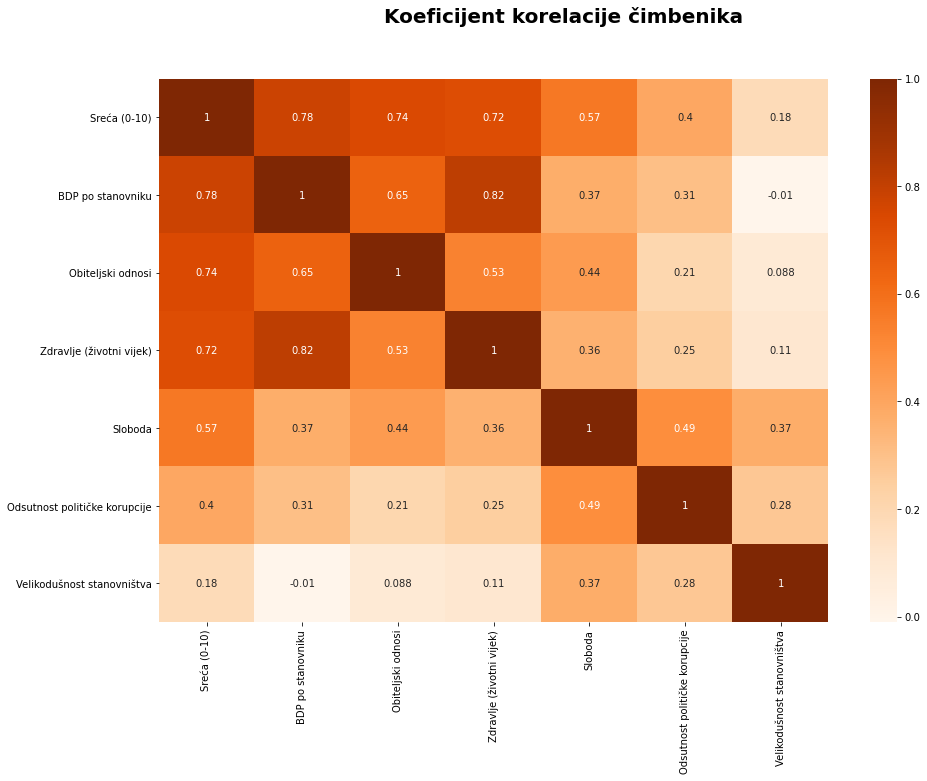

In [50]:
fig, ax = plt.subplots(figsize=(15, 10))
fig = sns.heatmap(podatci.drop(["Pozicija", "Ostatak (neobjašnjive komponente)"], axis=1).corr(), cmap="Oranges", annot = True)
plt.suptitle("Koeficijent korelacije čimbenika", fontsize=20, fontweight='bold');

Iz ove tablice moguće je primijetiti kako je koeficijent korelacije sreće najveći s ekonomskim stanjem države (0.78) što potvrđuje prijašnje navedenu tezu, no također je vidljivo kako obiteljski odnosi pojedinca (0.74) i zdravlje (0.72) uvelike utječu na sreću pojedinca. Vrijedi istaknuti također kako je najveća korelacija između zdravlja ili životnog vijeka pojedinca s ekonomskim stanjem države (0.82) što znači da ekonomsko stanje unutar države direktno utječe na njeno zdravstvo i životni vijek pojedinca te države <br><br><br>

### Sreća pojedinca prema regijama

Iz tablice podataka je vidljivo kako se na dnu nalaze slabo razvijene države, uglavnom iz Afrike, a one prema vrhu su dobro razvijene države Europe i Amerike. Kako bi utvrdili gdje se nalaze ostale regije moguće je vizualizirati prosječnu sreću pojedinca prema regiji

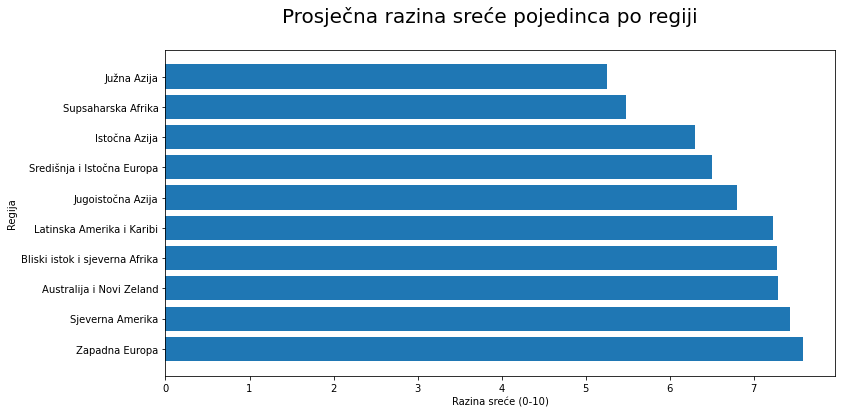

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))

fig = ax.barh(y=podatci["Regija"],
              width=podatci["Sreća (0-10)"])

ax.set(xlabel="Razina sreće (0-10)",
       ylabel="Regija")

plt.suptitle("Prosječna razina sreće pojedinca po regiji",
             fontsize=20);

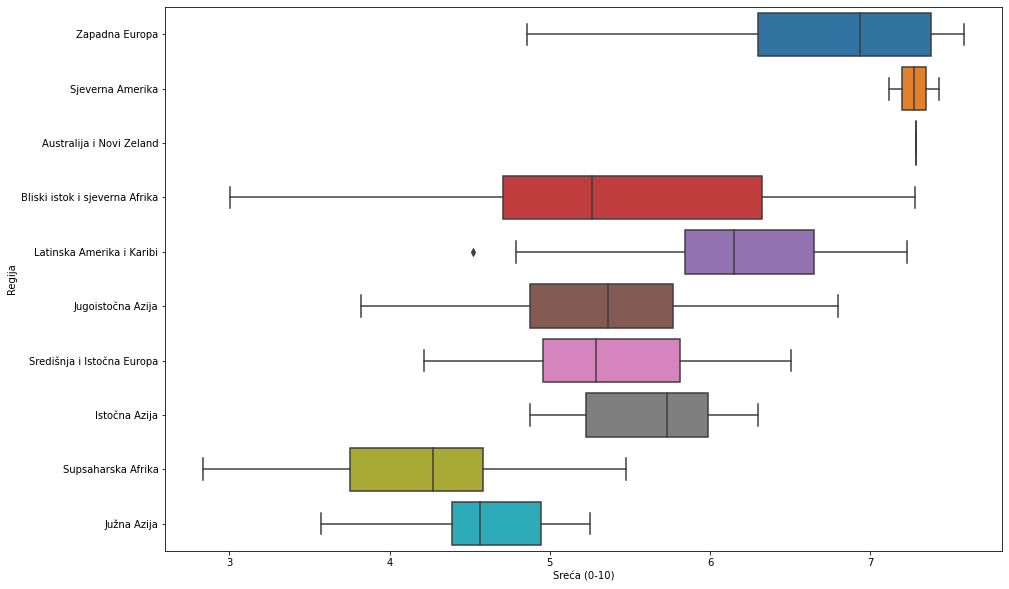

In [52]:
fig, ax = plt.subplots(figsize=(15,10))
fig = sns.boxplot(x="Sreća (0-10)", y="Regija", data=podatci[["Regija", "Sreća (0-10)"]]);

Iz ovih grafova moguće je doći do više zaključaka:

* samo su u Supsaharskom dijelu Afrike i južnom dijelu Azije pojedinci nesretniji nego u ostalim dijelovima svijeta
* distribucija razine sreće je velika u afričkim zemljama te varira od 3-7.2
* Azija i Supsaharska Afrika su najnesretniji kontinenti
* stanovnici središnje i istočne Europe (gdje se nalazi i Hrvatska) su nesretiniji nego većina ostalih kontinenata
* zapadna Europa i Sjeverna Amerika imaju najsretnije stanovnike
* iako se Sjeverna Amerika i Australija i Novi Zeland nalaze pri vrhu, njihov uzorak podataka je vrlo nizak iz razloga što obje regije sadržavaju samo dvije zemlje

### Uspoređivanje sreće i čimbenika Hrvatske u odnosnu na ostale zemlje

Kao što je prijašnje navedeno, središnja i istočna Europa je 4. najnesretnija regija na svijetu, gdje se također ubraja i Hrvatska. Kako bismo bolje razumjeli gdje se točno Hrvatska nalazi u usporedbi s ostalim srednjoeuropskim i istočno europskim zemljama, možemo usporediti ocjenu sreće pojedinca i gdje su te zemlje sveukupno rangirane.

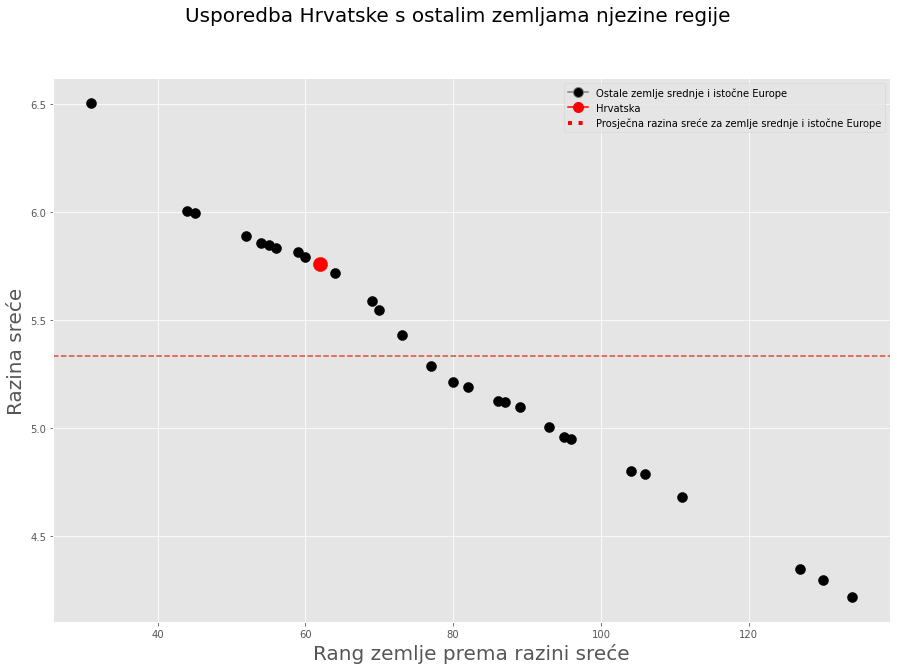

In [53]:
import warnings
warnings.filterwarnings(action="ignore")
from matplotlib.lines import Line2D

si_europa = podatci[podatci["Regija"] == "Središnja i Istočna Europa"]
hrv = si_europa[podatci["Država"] == "Croatia"]
ostala_europa = si_europa.drop(62, axis=0)
ostatak_svijeta = podatci.drop(62, axis=0)

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15,10))

fig = ax.scatter(x=ostala_europa["Pozicija"],
                 y=ostala_europa["Sreća (0-10)"],
                 s=100,
                 c="Black")

fig = ax.scatter(x=hrv["Pozicija"],
                 y=hrv["Sreća (0-10)"],
                 s=200,
                 c="Red")

plt.xlabel("Rang zemlje prema razini sreće", fontsize=20)
plt.ylabel("Razina sreće", fontsize=20)

plt.suptitle("Usporedba Hrvatske s ostalim zemljama njezine regije", fontsize=20);

ax.axhline(si_europa["Sreća (0-10)"].mean(),
           linestyle='--')

legend_elements = [
    Line2D([0], [0], marker='o', color="Gray", label='Ostale zemlje srednje i istočne Europe', 
           markerfacecolor='Black', markersize=10),
    Line2D([0], [0], marker='o', color="Red", label='Hrvatska', 
           markerfacecolor='Red', markersize=10),
    Line2D([0], [0], color='Red', linestyle='dotted', lw=4, label='Prosječna razina sreće za zemlje srednje i istočne Europe')
]

ax.legend(handles=legend_elements, loc='upper right');

<br><br>Uz pomoć grafa može se zaključiti da Hrvatska ima bolje rezultate nego većina zemalja srednje i istočne Europe, a razlog toga položaja utvridi će se kasnije detaljnom analizom svakoga čimbenika te kako on utječe na sreću hrvatskog stanovništva.<br>
Iz grafa su također i vidljivi ekstremi u razini sreće pojedinca.<br>
Pri vrhu se nalazi Češka Republika čija razina sreće pojedinca sadrži 6.505, a njihov vodeći faktor ili čimbenik su obiteljski odnosi.<br>
Na dnu se nalazi Bugarska s najnižom razinom sreće pojedinca u središnjoj i istočnoj Europi koja sadrži 4.218 te njihov najniži faktor je odsutnost političke korupcije. Razlog tomu je što je Bugarska poznata kao jedna od najkorumpiranijih zemalja te ima najveći indeks percepcije korupcije (CPI) od svih članica EU što ju čini najkorumpiranijom zemljom Europske Unije. Njihova vlada je optužena za mnoga krivotvorine, ilegalni utjecaj na tržište i mito.<br><br>

## Usporedba čimbenika (faktora) koji utječu na sreću kod Hrvatske i ostalih zemalja svijeta 

Sljedeći korak je usporediti sve glavne čimbenike kod Hrvatske s čimbenicima kod ostalih zemalja na globalnoj razini kako bi se utvrdili vodeći čimbenici sreće za hrvatsko stanovništvo te također čimbenici koji imaju najslabiji utjecaj u svrhu pronalaska problematičnih čimbenika koji negativno utjeću na sreću pojedinca unutar Republike Hrvatske

##### Usporedba ekonomskog čimbenika (BDP-a po stanovniku)

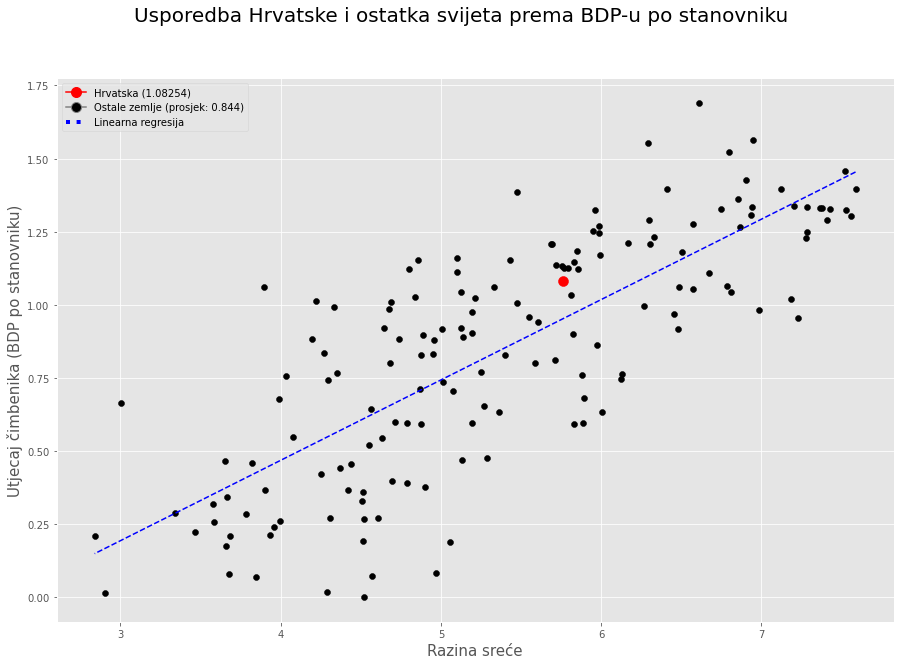

In [54]:
fig, ax = plt.subplots(figsize=(15,10))

fig = ax.scatter(x=ostatak_svijeta["Sreća (0-10)"],
                 y=ostatak_svijeta["BDP po stanovniku"],
                 c="Black")

fig = ax.scatter(x=hrv["Sreća (0-10)"],
                 y=hrv["BDP po stanovniku"],
                 c="Red",
                 s=100)

plt.xlabel("Razina sreće", fontsize=15)
plt.ylabel("Utjecaj čimbenika (BDP po stanovniku)", fontsize=15)

plt.suptitle("Usporedba Hrvatske i ostatka svijeta prema BDP-u po stanovniku", fontsize=20)

m, b = np.polyfit(podatci["Sreća (0-10)"], podatci["BDP po stanovniku"], 1)
plt.plot(podatci["Sreća (0-10)"], m*podatci["Sreća (0-10)"]+b,
         linestyle='--',
         color="Blue")

legend_elements = [
    Line2D([0], [0], marker='o', color="Red", label='Hrvatska ('+str(hrv.at[62, "BDP po stanovniku"])+')', 
           markerfacecolor='Red', markersize=10),
    Line2D([0], [0], marker='o', color="Gray", 
           label='Ostale zemlje (prosjek: '+str(ostatak_svijeta["BDP po stanovniku"].mean())[:5]+')', 
           markerfacecolor='Black', markersize=10),
    Line2D([0], [0], color='Blue', linestyle='dotted', lw=4, label='Linearna regresija')
]

ax.legend(handles=legend_elements, loc='upper left');

Graf prikazuje utjecaj čimbenika BDP-a po stanvoniku i razinu sreće određene države te pomoću toga možemo utvrditi koliko ekonomski čimbenik utječe zapravo na reću pojedinca unutar svake države. Čimbenik BDP-a po stanovniku utječe više na države koje se nalaze iznad linearne regresije nego prosječno, gdje se nalazi i Hrvatska čiji ekonomski čimbenik sadrži 1.08, dok u prosjeku kod svih država na globalnoj razini on sadrži 0.84.

##### Usporedba čimbenika obiteljskih odnosa 

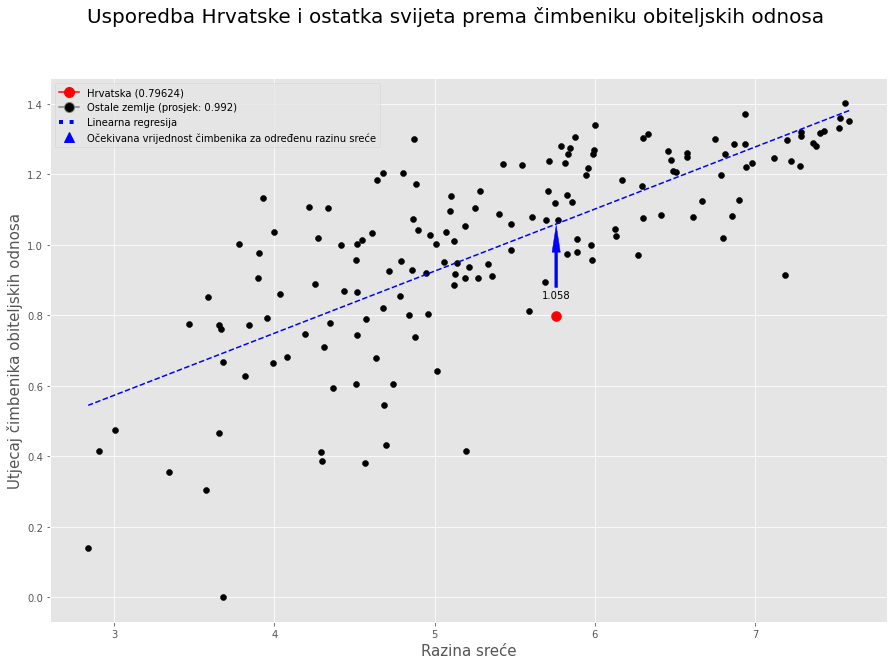

In [55]:
fig, ax = plt.subplots(figsize=(15,10))

fig = ax.scatter(x=ostatak_svijeta["Sreća (0-10)"],
                 y=ostatak_svijeta["Obiteljski odnosi"],
                 c="Black")

fig = ax.scatter(x=hrv["Sreća (0-10)"],
                 y=hrv["Obiteljski odnosi"],
                 c="Red",
                 s=100)

plt.xlabel("Razina sreće", fontsize=15)
plt.ylabel("Utjecaj čimbenika obiteljskih odnosa", fontsize=15)

plt.suptitle("Usporedba Hrvatske i ostatka svijeta prema čimbeniku obiteljskih odnosa", fontsize=20)

m, b = np.polyfit(podatci["Sreća (0-10)"], podatci["Obiteljski odnosi"], 1)
plt.plot(podatci["Sreća (0-10)"], m*podatci["Sreća (0-10)"]+b,
         linestyle='--',
         color="Blue")

ocekivani_utjecaj = podatci["Sreća (0-10)"], m*podatci["Sreća (0-10)"]+b
broj = str(ocekivani_utjecaj[1][62])

plt.arrow(ocekivani_utjecaj[0][62], ocekivani_utjecaj[1][62]-0.18, 0, 0.1, width = 0.017, color="Blue")
plt.annotate(broj[:5] ,(ocekivani_utjecaj[0][62]-0.09, ocekivani_utjecaj[1][62]-0.21))

legend_elements = [
    Line2D([0], [0], marker='o', color="Red", label='Hrvatska ('+str(hrv.at[62, "Obiteljski odnosi"])+')', 
           markerfacecolor='Red', markersize=10),
    Line2D([0], [0], marker='o', color="Gray", 
           label='Ostale zemlje (prosjek: '+str(ostatak_svijeta["Obiteljski odnosi"].mean())[:5]+')', 
           markerfacecolor='Black', markersize=10),
    Line2D([0], [0], color='Blue', linestyle='dotted', lw=4, label='Linearna regresija'),
    Line2D([0], [0], marker='^', color="Blue", label='Očekivana vrijednost čimbenika za određenu razinu sreće', 
          markersize=10, linewidth=0)
]

ax.legend(handles=legend_elements, loc='upper left');

Sljedeći čimbenik su obiteljski odnosi koji je niži u Republici Hrvatskoj nego prosječno. Utjecaj ovoga čimbenika u Hrvatskoj je samo 0.79 dok je u ostalim zemljama njegov prosjek 0.99 što znači da u Hrvatskoj obiteljski odnosi ne utječu toliko na sreću pojedinca kao u ostalim zemljama. Također vrijedi naglasiti kako, iako je prosječna vrijednost čimbenika obitelji 0.99, njegova očekivana vrijednost za razinu sreće od 5.76 koju posjeduje Hrvatska je 1.058 što znači da je taj faktor još niži nego što je očekivano.

##### Usporedba čimbenika zdravlja i životnog vijeka

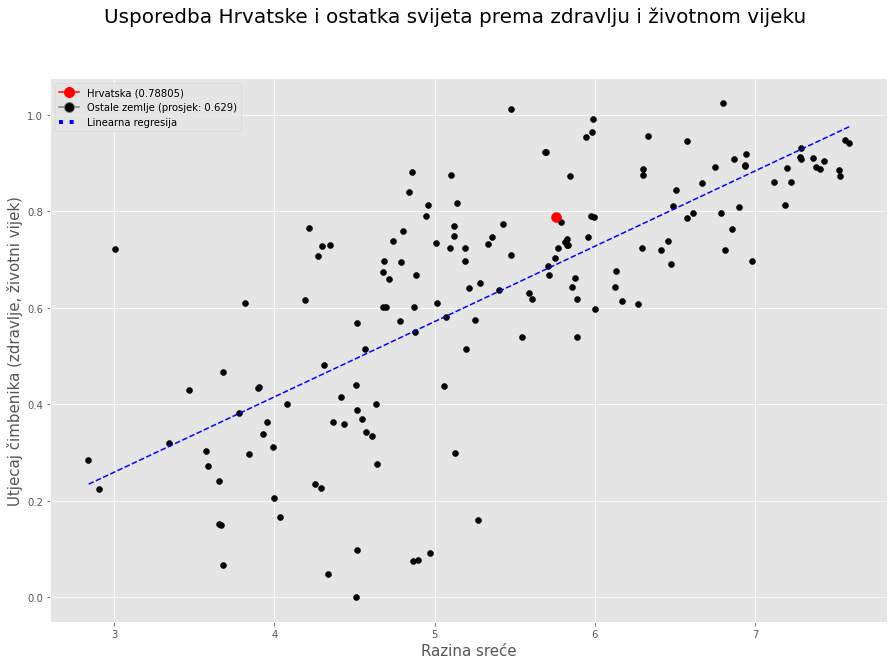

In [56]:
fig, ax = plt.subplots(figsize=(15,10))

fig = ax.scatter(x=ostatak_svijeta["Sreća (0-10)"],
                 y=ostatak_svijeta["Zdravlje (životni vijek)"],
                 c="Black")

fig = ax.scatter(x=hrv["Sreća (0-10)"],
                 y=hrv["Zdravlje (životni vijek)"],
                 c="Red",
                 s=100)

plt.xlabel("Razina sreće", fontsize=15)
plt.ylabel("Utjecaj čimbenika (zdravlje, životni vijek)", fontsize=15)

plt.suptitle("Usporedba Hrvatske i ostatka svijeta prema zdravlju i životnom vijeku", fontsize=20)

m, b = np.polyfit(podatci["Sreća (0-10)"], podatci["Zdravlje (životni vijek)"], 1)
plt.plot(podatci["Sreća (0-10)"], m*podatci["Sreća (0-10)"]+b,
         linestyle='--',
         color="Blue")

legend_elements = [
    Line2D([0], [0], marker='o', color="Red", label='Hrvatska ('+str(hrv.at[62, "Zdravlje (životni vijek)"])+')', 
           markerfacecolor='Red', markersize=10),
    Line2D([0], [0], marker='o', color="Gray", 
           label='Ostale zemlje (prosjek: '+str(ostatak_svijeta["Zdravlje (životni vijek)"].mean())[:5]+')', 
           markerfacecolor='Black', markersize=10),
    Line2D([0], [0], color='Blue', linestyle='dotted', lw=4, label='Linearna regresija')
]

ax.legend(handles=legend_elements, loc='upper left');

Prema čimbeniku zdravlja i životnog vijeka, Hrvatska nadmašuje očekivani prosjek.<br>
Važno je naglasiti kako se većina zemalja s najvećom razinom sreće (7+) nalazi ispod prosječne vrijednost

##### Usporedba čimbenika slobode pojedinca

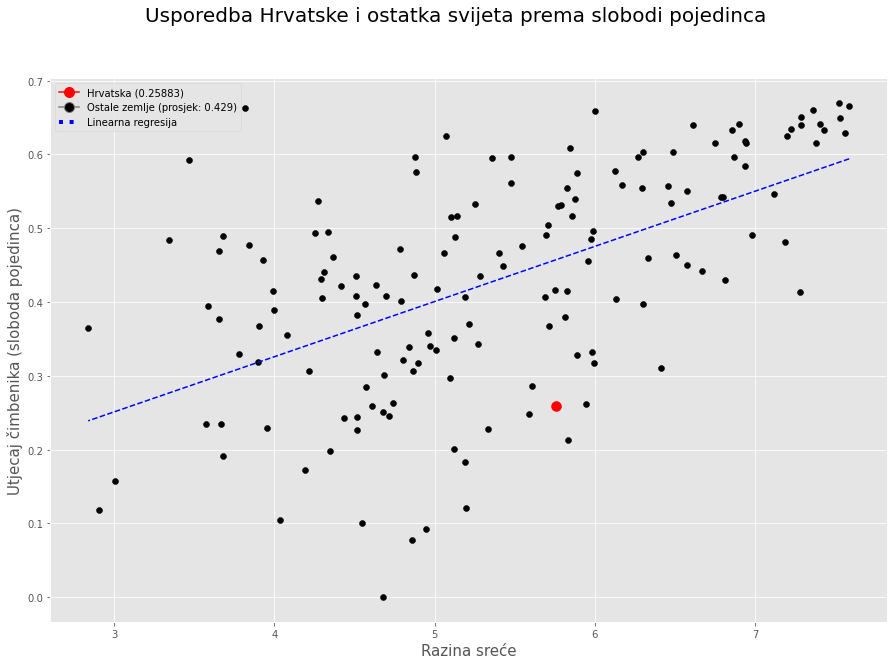

In [57]:
fig, ax = plt.subplots(figsize=(15,10))

fig = ax.scatter(x=ostatak_svijeta["Sreća (0-10)"],
                 y=ostatak_svijeta["Sloboda"],
                 c="Black")

fig = ax.scatter(x=hrv["Sreća (0-10)"],
                 y=hrv["Sloboda"],
                 c="Red",
                 s=100)

plt.xlabel("Razina sreće", fontsize=15)
plt.ylabel("Utjecaj čimbenika (sloboda pojedinca)", fontsize=15)

plt.suptitle("Usporedba Hrvatske i ostatka svijeta prema slobodi pojedinca", fontsize=20)

m, b = np.polyfit(podatci["Sreća (0-10)"], podatci["Sloboda"], 1)
plt.plot(podatci["Sreća (0-10)"], m*podatci["Sreća (0-10)"]+b,
         linestyle='--',
         color="Blue")

legend_elements = [
    Line2D([0], [0], marker='o', color="Red", label='Hrvatska ('+str(hrv.at[62, "Sloboda"])+')', 
           markerfacecolor='Red', markersize=10),
    Line2D([0], [0], marker='o', color="Gray", 
           label='Ostale zemlje (prosjek: '+str(ostatak_svijeta["Sloboda"].mean())[:5]+')', 
           markerfacecolor='Black', markersize=10),
    Line2D([0], [0], color='Blue', linestyle='dotted', lw=4, label='Linearna regresija')
]

ax.legend(handles=legend_elements, loc='upper left');

Kada je u pitanju utjecaj slobode na sreću pojedinca, Hrvatska se nalazi pri dnu te je čak 60% ispod prosječne razine navedenog čimbenika. Važno je ponvno napomeunti kako razina čimbenika samo govori koliko on utječe na sreću pojedinca unutar države, što znači da kod hrvatskog stanovništva sloboda utječe na sreću pojedinca u malim količinama  

##### Usporedba čimbenika odsutnosti političke korupcije

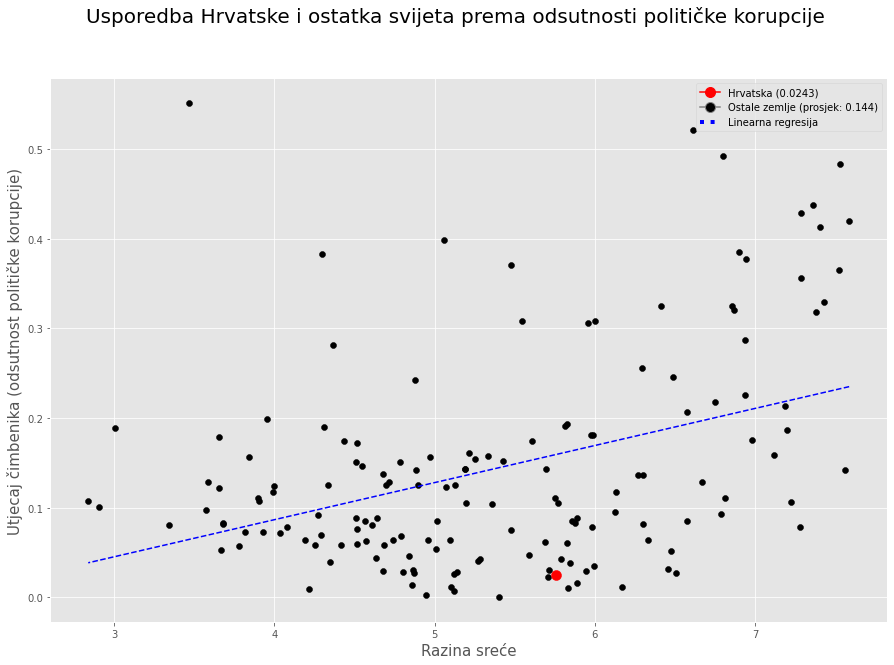

In [58]:
fig, ax = plt.subplots(figsize=(15,10))

fig = ax.scatter(x=ostatak_svijeta["Sreća (0-10)"],
                 y=ostatak_svijeta["Odsutnost političke korupcije"],
                 c="Black")

fig = ax.scatter(x=hrv["Sreća (0-10)"],
                 y=hrv["Odsutnost političke korupcije"],
                 c="Red",
                 s=100)

plt.xlabel("Razina sreće", fontsize=15)
plt.ylabel("Utjecaj čimbenika (odsutnost političke korupcije)", fontsize=15)

plt.suptitle("Usporedba Hrvatske i ostatka svijeta prema odsutnosti političke korupcije", fontsize=20)

m, b = np.polyfit(podatci["Sreća (0-10)"], podatci["Odsutnost političke korupcije"], 1)
plt.plot(podatci["Sreća (0-10)"], m*podatci["Sreća (0-10)"]+b,
         linestyle='--',
         color="Blue")

legend_elements = [
    Line2D([0], [0], marker='o', color="Red", label='Hrvatska ('+str(hrv.at[62, "Odsutnost političke korupcije"])+')', 
           markerfacecolor='Red', markersize=10),
    Line2D([0], [0], marker='o', color="Gray", 
           label='Ostale zemlje (prosjek: '+str(ostatak_svijeta["Odsutnost političke korupcije"].mean())[:5]+')', 
           markerfacecolor='Black', markersize=10),
    Line2D([0], [0], color='Blue', linestyle='dotted', lw=4, label='Linearna regresija')
]

ax.legend(handles=legend_elements, loc='upper right');

Čimbenik odsutnosti političke korupcije ne utječe značajno na razinu sreće s obzirom da je njegova prosječna razina 0.14, no Hrvatska se kod ovoga čimbenika, čija je razina 0.02, također nalazi ispod prosjeka.<br><br>
Ovaj čimbenik je težak za interpretirati jer može imati više značenja za države:
* na razinu sreće stanovništva ne utječe odsutnost političke korupcije
* ne postoji odsutnost političke korupcije zbog čega ne može niti utjecati na razinu sreće

##### Usporedba čimbenika velikodušnosti stanovništva

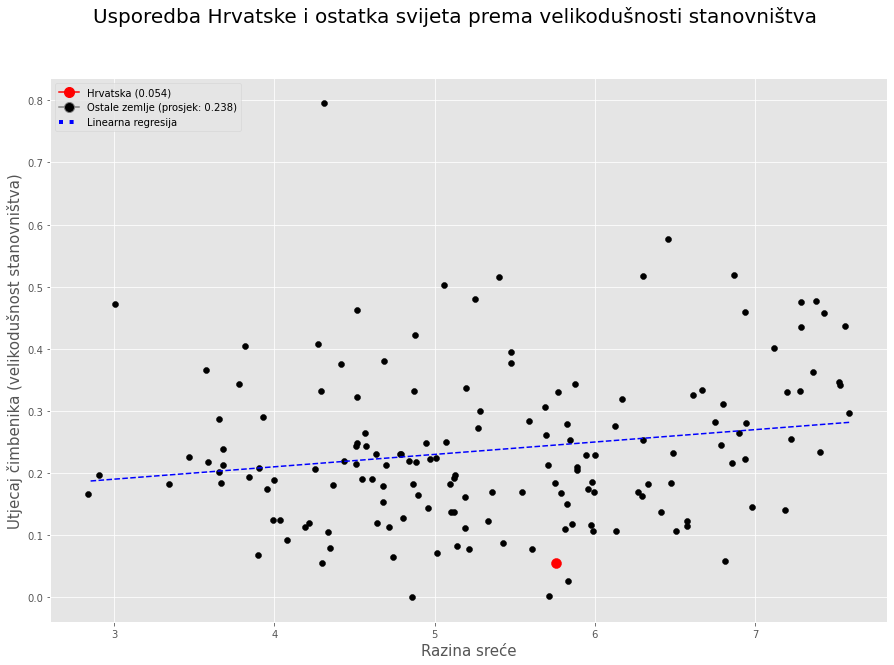

In [59]:
fig, ax = plt.subplots(figsize=(15,10))

fig = ax.scatter(x=ostatak_svijeta["Sreća (0-10)"],
                 y=ostatak_svijeta["Velikodušnost stanovništva"],
                 c="Black")

fig = ax.scatter(x=hrv["Sreća (0-10)"],
                 y=hrv["Velikodušnost stanovništva"],
                 c="Red",
                 s=100)

plt.xlabel("Razina sreće", fontsize=15)
plt.ylabel("Utjecaj čimbenika (velikodušnost stanovništva)", fontsize=15)

plt.suptitle("Usporedba Hrvatske i ostatka svijeta prema velikodušnosti stanovništva", fontsize=20)

m, b = np.polyfit(podatci["Sreća (0-10)"], podatci["Velikodušnost stanovništva"], 1)
plt.plot(podatci["Sreća (0-10)"], m*podatci["Sreća (0-10)"]+b,
         linestyle='--',
         color="Blue")

legend_elements = [
    Line2D([0], [0], marker='o', color="Red", label='Hrvatska ('+str(hrv.at[62, "Velikodušnost stanovništva"])[:5]+')', 
           markerfacecolor='Red', markersize=10),
    Line2D([0], [0], marker='o', color="Gray", 
           label='Ostale zemlje (prosjek: '+str(ostatak_svijeta["Velikodušnost stanovništva"].mean())[:5]+')', 
           markerfacecolor='Black', markersize=10),
    Line2D([0], [0], color='Blue', linestyle='dotted', lw=4, label='Linearna regresija')
]

ax.legend(handles=legend_elements, loc='upper left');

Prema utjecaju čimbenika velikodušnosti stanovništva, Hrvatska je jedna od zemalja s najlošijim rezultatima te je četvrta najgora zemlja što se tiče toga čimbenika. Velikodušnost stanovništva predstavlja koliko ponašanje i dobronamjernost ostalih sugrađana utječe na sreću pojedinca, što nema veliki utjecaj kod Hrvata prema podatcima

## Usporedba čimbenika (faktora) na globalnoj razini

In [120]:
import plotly.express as px

fig = px.choropleth(podatci, locations="Država", locationmode='country names', 
                  color="Sreća (0-10)", hover_name="Država", 
                  title="Države prema razini sreće", hover_data=["Sreća (0-10)"], color_continuous_scale='Burgyl',)
fig.show()
podatci[["Država", "Sreća (0-10)"]].sort_values(by=["Sreća (0-10)"], ascending=False).head(10)

,Država,Sreća (0-10)
1,Switzerland,7.587
2,Iceland,7.561
3,Denmark,7.527
4,Norway,7.522
5,Canada,7.427
6,Finland,7.406
7,Netherlands,7.378
8,Sweden,7.364
9,New Zealand,7.286
10,Australia,7.284


Švicarska je najsretnija zemlja s razinom sreće od 7.587, a uz nju se nalaze i nordijske zemlje koje se sve nalaze u 10 najsretnijih država.<br>
Jedan od razloga zašto se sve nordijske države nalaze u 10 najsretnijih država je njihov edukacijski sustav i besplatno zdravstvo, no najvažniji faktor od svega za sreću ovih država je prioritizacija uravnoteženog života kao što tvrdi Jeff Sachs koji je jedan od osnivatelja World Happiness Reporta i ove baze podataka koja je iskorištena. Također govori kako ljudi u nordijskim zemljama: "Sreću pronalazimo u vlastitoj potrazi i živeći u društvima koja su uravnoteženija."<br>
Kada bi se usporedili radni sati tijekom tjedna u Danskoj, koji uobičajeno sadrže oko 37 sati koji su raspoređeni u 5 radnih dana (7.4 sata po danu), s radnim satima u SAD-u koji se sastoje od 44 sata u tjedan dana (8.8 sati po danu), mogla bi se primijetiti znatna razlika od čak 7 sati dodatnog rada u Americi što bi u Danskoj predstavljalo gotovo jedan dodatni radni dan.<br>
Uz nordijske zemlje i Švicarsku, među najsretnijim državama se također nalaze i Kanada zajedno s Australijom i Novim Zelandom. 

##### Ekonomski čimbenik (BDP po stanovniku)

In [129]:
fig = px.choropleth(podatci, locations="Država", locationmode='country names', 
                  color="BDP po stanovniku", hover_name="Država", 
                  title="Države prema razini ekonomskog čimbenika", 
                  hover_data=["BDP po stanovniku"], color_continuous_scale='matter',)
fig.show()
podatci[["Država", "BDP po stanovniku"]].sort_values(by=["BDP po stanovniku"], ascending=False).head(10)

,Država,BDP po stanovniku
28,Qatar,1.69042
17,Luxembourg,1.56391
39,Kuwait,1.55422
24,Singapore,1.52186
4,Norway,1.45900
20,United Arab Emirates,1.42727
1,Switzerland,1.39651
35,Saudi Arabia,1.39541
15,United States,1.39451
72,Hong Kong,1.38604


Prema razini utjecaja ekonomskog čimbenika na sreću, pri vrhu se nalaze države poput Katra, Singapur, Luksemburga i UAE koji su poznati po njihovim viskoim prihodima i povoljnim porezima. Jedan od glavnih razloga zašto su ovakve države pri vrhu ekonomskog čimbenika jest upravo to što su savršena mjesta za velike zarade i prihode novca te ljudi migriraju u takve zemlje iz toga razloga. Zbog toga ovaj čimbenik najviše utječe i na sreću pojedinca unutar ovih zemalja. 

##### Čimbenik obiteljskih odnosa

In [132]:
fig = px.choropleth(podatci, locations="Država", locationmode='country names', 
                  color="Obiteljski odnosi", hover_name="Država", 
                  title="Države prema čimbeniku obiteljskih odnosa", hover_data=["Obiteljski odnosi"], color_continuous_scale='Brwnyl',)
fig.show()
podatci[["Država", "Obiteljski odnosi"]].sort_values(by=["Obiteljski odnosi"], ascending=False).head(10) 

,Država,Obiteljski odnosi
2,Iceland,1.40223
18,Ireland,1.36948
3,Denmark,1.36058
1,Switzerland,1.34951
44,Uzbekistan,1.34043
4,Norway,1.33095
5,Canada,1.32261
9,New Zealand,1.31967
6,Finland,1.31826
36,Spain,1.31379


Gledajući čimbenik obiteljskih odnosa, pri vrhu se ponovno nalaze Nordijske zemlje zahvaljujući njihovoj prijašnje navedenoj kulturi i stilu života koji prioritizira uravnotežen život i niske radne sate što daje više vremena pojedincima da učvršćuju obiteljske odnose što dovodi do visoke razine ovoga čimbenika. <br>
Zemlje koje ima nižu razinu sreće od ostalih zemalja, a nalazi se pri vrhu razine ovoga čimbenika su Uzbekistan i Španjolska <br>
Uzbekistan je jedna od zemalja koja nije potpuno razvijena te nije financijski snažna zemlja, no unatoč tome svemu čine potrebne postupke kako bi ojačali obiteljske odnose i veze te pružaju obiteljima svu potrebnu pomoć kako bi omogućili zdravu i sretnu okolinu za obitelj i odgajanje djeteta. Još veći naglasak se stavlja na obiteljske odnose, nakon što uzbekistanska predsjednica potpisuje dekret zahvaljujući kojemu se osniva znanstveno istraživačko središte nazvano „Oila“ (u prijevodu Obitelj) koje je zaslužno za provođenje mjera i učinkovitih metoda rada s obiteljima koje se nalaze u nepovoljnom položaju, analiziraju i pokušavaju spriječiti probleme u obiteljskim odnosima te pripremaju mlade brak i osnivanje funkcionirajuće obitelji. <br>
Španjolska se također nalazi pri vrhu obiteljskih odnosa, što je rezultat njihove povijesti i kulture. Tijekom financijske krize u Španjolskoj mnogi su izgubili poslove te su se ljudi morali oslanjati na obitelji za moralnu i financijsku podršku, a mnogi su se i preseljavali nazad kod svojih roditelja nakon godina samostalnog života. Ovi događaji su dodatno zbližili obitelji koje su već imale snažnu obiteljsku vezu zahvaljujući njihovoj kulturi

##### Čimbenik zdravlja i životnog vijeka

In [136]:
fig = px.choropleth(podatci, locations="Država", locationmode='country names', 
                  color="Zdravlje (životni vijek)", hover_name="Država", 
                  title="Države prema čimbeniku zdravlja i životnog vijeka", 
                    hover_data=["Zdravlje (životni vijek)"], color_continuous_scale='amp',)
fig.show()
podatci[["Država", "Zdravlje (životni vijek)"]].sort_values(by=["Zdravlje (životni vijek)"], ascending=False).head(10) 

,Država,Zdravlje (životni vijek)
24,Singapore,1.02525
72,Hong Kong,1.01328
46,Japan,0.99111
47,South Korea,0.96538
36,Spain,0.95562
50,Italy,0.95446
2,Iceland,0.94784
29,France,0.94579
1,Switzerland,0.94143
10,Australia,0.93156
